In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yahoo_fin.stock_info as si
import yahoo_fin as yhf
from yahoo_finance import Share
import streamlit as st
import yfinance as yf
import plotly.graph_objects as go


In [40]:
def get_market_idx():
    from bs4 import BeautifulSoup
    import requests

    website_html = requests.get("https://finance.yahoo.com/world-indices/").text
    soup = BeautifulSoup(website_html)
    table = soup.find("tbody", {"data-reactid": "36"})
    table_text = [[cell.text for cell in row.contents] for row in table.contents]
    mkt_df = pd.DataFrame(table_text, columns=["Symbol","Name","LastPrice","Change","pct_change","Volume", "intraday_high_low","52_week_range","day_chart"])
    filter_mkt_lst = ["S&P 500","Dow 30","Nasdaq","Russell 2000", "Crude Oil", "Gold"]
    mkt_df = mkt_df[mkt_df.Name.isin(filter_mkt_lst)][["Name","LastPrice","Change","pct_change"]]
    return mkt_df

,Name,LastPrice,Change,pct_change
0,S&P 500,"4,685.96",+3.11,+0.07%
1,Dow 30,"36,196.02",+95.71,+0.27%
2,Nasdaq,"15,831.77",-29.19,-0.18%
6,Russell 2000,"2,408.35",-3.43,-0.14%


In [74]:
keys_col1 = ("Previous Close", "Open", "Bid", "Ask", "Day's Range", "52 Week Range", "Volume", "Avg. Volume")
keys_col2 = ("Market Cap", "Beta (5Y Monthly)" , "PE Ratio (TTM)" , "EPS (TTM)" , "Earnings Date" , "Forward Dividend & Yield" , "Ex-Dividend Date" , "1y Target Est")
summary = si.get_quote_table("DELL")
summary1 = { your_key: summary[your_key] for your_key in keys_col1 }
summary1 = pd.DataFrame.from_dict(summary1, orient='index')
summary1[0] = summary1[0].astype(str)
summary1.columns= ['']
summary2 = { your_key: summary[your_key] for your_key in keys_col2 }
summary2 = pd.DataFrame.from_dict(summary2, orient='index')
summary2[0] = summary2[0].astype(str)
summary2.columns= ['']
summary1.reset_index(inplace=True)
summary2.reset_index(inplace=True)
summary3 = pd.concat([summary1, summary2], axis=1)
summary3.reset_index(drop=True)
sumarr = np.array(summary3)
final_summary = pd.DataFrame(data=sumarr)

NameError: name 'np' is not defined

In [49]:
si.get_market_status()

'REGULAR'

In [245]:
#a = sum_info.reset_index(drop=True)
#z =.style.applymap(color_negative_red)
#a = a[["index", ""]]
#a.columns = ['','','','',]
#a.drop('level_0', axis=1, inplace=True)
#index = [1,2,3,4,5,6,7,8]
#a.index=index
#a.reset_index(drop=True, inplace=True)
#b = a.reset_index(drop=True)
#a.style.applymap(color_negative_red)
b = np.array(a)
d = pd.DataFrame(data=b)
d

,0,1,2,3,4,5
0,0,Previous Close,56.36,0,Market Cap,42.424B
1,1,Open,56.37,1,Beta (5Y Monthly),0.86
2,2,Bid,55.50 x 800,2,PE Ratio (TTM),11.49
3,3,Ask,55.52 x 800,3,EPS (TTM),4.83
4,4,Day's Range,55.35 - 56.79,4,Earnings Date,"Nov 23, 2021"
5,5,52 Week Range,32.07 - 58.29,5,Forward Dividend & Yield,N/A (N/A)
6,6,Volume,2575302.0,6,Ex-Dividend Date,NaN
7,7,Avg. Volume,5413025.0,7,1y Target Est,89.83


In [75]:
def get_quote_table(ticker):
        keys_col1 = ("Previous Close", "Open", "Bid", "Ask", "Day's Range", "52 Week Range", "Volume", "Avg. Volume")
        keys_col2 = ("Market Cap", "Beta (5Y Monthly)" , "PE Ratio (TTM)" , "EPS (TTM)" , "Earnings Date" , "Forward Dividend & Yield" , "Ex-Dividend Date" , "1y Target Est")
        summary = si.get_quote_table(ticker)     
        summary1 = { your_key: summary[your_key] for your_key in keys_col1 }
        summary2 = { your_key: summary[your_key] for your_key in keys_col2 }
        summary1 = pd.DataFrame.from_dict(summary1, orient='index')
        summary2 = pd.DataFrame.from_dict(summary2, orient='index')
        return summary2

In [76]:
#define dataframe table hover style
def hover(hover_color="blue"):
        return dict(selector="tr:hover",
                    props=[("background-color", "%s" % hover_color)])

#define table style function
def set_styles(results):
    table_styles = [
                hover(),
                dict(selector="th", props=[("font-size", "auto"),
                ("text-align", "center")]),
                dict(selector="caption", props=[("caption-side", "bottom")])
                ]
    return (
        results.style.set_table_styles(table_styles)
        .set_properties(**{"background-color": "black", "color": "white"})

    )

In [77]:
def get_quote_table(ticker):
    keys_col1 = ("Previous Close", "Open", "Bid", "Ask", "Day's Range", "52 Week Range", "Volume", "Avg. Volume")
    keys_col2 = ("Market Cap", "Beta (5Y Monthly)" , "PE Ratio (TTM)" , "EPS (TTM)" , "Earnings Date" , "Forward Dividend & Yield" , "Ex-Dividend Date" , "1y Target Est")
    summary = si.get_quote_table(ticker)
    summary1 = { your_key: summary[your_key] for your_key in keys_col1 }
    summary1 = pd.DataFrame.from_dict(summary1, orient='index')
    #summary1.rename(columns = {0:'Value'}, inplace = False)
    summary1[0] = su[0].astype(str)
    #summary1.columns= ['']
    summary2 = { your_key: summary[your_key] for your_key in keys_col2 }
    summary2 = pd.DataFrame.from_dict(summary2, orient='index')
    #summary2.rename(columns = {0:'Value'}, inplace = False)
    summary2[0] = summary2[0].astype(str)
    #summary2.columns= ['']
    df1_styler = summary1.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
    df2_styler = summary2.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')
    return display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

In [78]:
summary1

,index,
0,Previous Close,56.19
1,Open,56.36
2,Bid,55.93 x 800
3,Ask,56.30 x 800
4,Day's Range,55.83 - 56.58
5,52 Week Range,33.25 - 58.29
6,Volume,3944142.0
7,Avg. Volume,5575618.0


In [79]:
a = pd.concat([d.reset_index(drop=False) for d in [summary1, summary2]], axis=1)
a.columns= ['','','','']
type(a)


ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

In [29]:
ticker = "DELL"
keys_col1 = ("Previous Close", "Open", "Bid", "Ask", "Day's Range", "52 Week Range", "Volume", "Avg. Volume")
keys_col2 = ("Market Cap", "Beta (5Y Monthly)" , "PE Ratio (TTM)" , "EPS (TTM)" , "Earnings Date" , "Forward Dividend & Yield" , "Ex-Dividend Date" , "1y Target Est")
summary = si.get_quote_table(ticker)

In [54]:
keys_col1 = ("Previous Close", "Open", "Bid", "Ask", "Day's Range", "52 Week Range", "Volume", "Avg. Volume")
summary1 = { your_key: summary[your_key] for your_key in keys_col1 }
summary1 = pd.DataFrame.from_dict(summary1, orient='index')
summary1.rename(columns = {0:'Value'}, inplace = False)
#summary1["Value"] = summary1["Value"].astype(str)
summary1.columns= ['']
summary1

,
Previous Close,56.36
Open,56.37
Bid,55.50 x 800
Ask,55.52 x 800
Day's Range,55.35 - 56.79
52 Week Range,32.07 - 58.29
Volume,2575302.0
Avg. Volume,5413025.0


In [56]:
summary2 = { your_key: summary[your_key] for your_key in keys_col2 }
summary2 = pd.DataFrame.from_dict(summary2, orient='index')
summary2.rename(columns = {0:'Value'}, inplace = False)
#summary2[0] = summary[0].astype(str)
summary2.columns= ['']
df1_styler = summary1.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
df2_styler = summary2.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')
#return set_styles(display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True))

In [58]:
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,
Previous Close,56.360000
Open,56.370000
Bid,55.50 x 800
Ask,55.52 x 800
Day's Range,55.35 - 56.79
52 Week Range,32.07 - 58.29
Volume,2575302.000000
Avg. Volume,5413025.000000
,
Market Cap,42.424B


In [23]:
import numpy as np
import pandas as pd   
from IPython.display import display_html 

df1 = a
df2 = b

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,0
Market Cap,42.441B
Beta (5Y Monthly),0.860000
PE Ratio (TTM),11.490000
EPS (TTM),4.830000
Earnings Date,"Nov 23, 2021"
Forward Dividend & Yield,N/A (N/A)
Ex-Dividend Date,nan
1y Target Est,89.830000
,0
Market Cap,42.441B


In [20]:
a = get_quote_table("AAPL")
b = a = get_quote_table("DELL")

In [21]:
display_side_by_side(a, b)

,0
Market Cap,42.441B
Beta (5Y Monthly),0.86
PE Ratio (TTM),11.49
EPS (TTM),4.83
Earnings Date,"Nov 23, 2021"
Forward Dividend & Yield,N/A (N/A)
Ex-Dividend Date,NaN
1y Target Est,89.83
,0
Market Cap,42.441B


In [16]:
    summary = si.get_quote_table("AAPL")
    #summary = pd.DataFrame.from_dict(summary, orient='index')
    keys_col1 = ("Previous Close", "Open", "Bid", "Ask", "Day's Range", "52 Week Range", "Volume", "Avg. Volume")
    #summary.rename(columns = {0:'Value'}, inplace = False)
    #summary[0] = summary[0].astype(str)
    summary = { your_key: summary[your_key] for your_key in keys_col1 }
    #summary["Metrics"] = summary.index
    #summary = summary.drop(summary, inplace=False, axis=1)
    #summary.columns= ['','']
    #summary = summary.reset_index(drop=True)
    #summary[["a", 0]]
    summary

{'Previous Close': 151.28,
 'Open': 151.41,
 'Bid': '150.56 x 1000',
 'Ask': '150.57 x 1000',
 "Day's Range": '150.16 - 151.55',
 '52 Week Range': '112.59 - 157.26',
 'Volume': 42469744.0,
 'Avg. Volume': 75978245.0}

In [7]:
si.get_cash_flow("AAPL")

endDate,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Breakdown,,,,
investments,-2819000000,5335000000,58093000000,30845000000
changeToLiabilities,14002000000,-1981000000,-2548000000,9172000000
totalCashflowsFromInvestingActivities,-14545000000,-4289000000,45896000000,16066000000
netBorrowings,12665000000,2499000000,-7819000000,432000000
totalCashFromFinancingActivities,-93353000000,-86820000000,-90976000000,-87876000000
changeToOperatingActivities,-6146000000,881000000,-896000000,30016000000
issuanceOfStock,1105000000,880000000,781000000,669000000
netIncome,94680000000,57411000000,55256000000,59531000000
changeInCash,-3860000000,-10435000000,24311000000,5624000000


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: 15m data not available for startTime=1609517921 and endTime=1636906721. The requested range must be within the last 60 days.


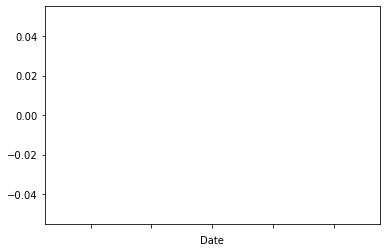

In [105]:

hist = yf.download("AAPL", period="YTD",  interval = "15m")
hist.Close.plot()
plt.show()
#hist[["Close"]]

In [104]:
si.("AAPL", )

{'1y Target Est': 168.45,
 '52 Week Range': '112.59 - 157.26',
 'Ask': '149.73 x 1000',
 'Avg. Volume': 75722023.0,
 'Beta (5Y Monthly)': 1.21,
 'Bid': '149.70 x 2900',
 "Day's Range": '147.48 - 150.40',
 'EPS (TTM)': 5.61,
 'Earnings Date': 'Jan 25, 2022 - Jan 31, 2022',
 'Ex-Dividend Date': 'Nov 05, 2021',
 'Forward Dividend & Yield': '0.88 (0.59%)',
 'Market Cap': '2.461T',
 'Open': 148.43,
 'PE Ratio (TTM)': 26.74,
 'Previous Close': 147.87,
 'Quote Price': 149.99000549316406,
 'Volume': 63635596.0}

In [124]:
import plotly.express as px
hist = yf.download("AAPL", interval = "1d")
fig = px.area(hist.Open)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(count=5, label="5Y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),rangeselector_bgcolor="white"
)

fig.show()

[*********************100%***********************]  1 of 1 completed


In [82]:
import plotly.express as px
hist = yf.download("AAPL", period="YTD")
fig = px.line(hist.Close)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),rangeselector_bgcolor="white"
)

fig.show()

[*********************100%***********************]  1 of 1 completed


In [184]:
current_date = datetime.now().date()
current_weekday = current_date.weekday()
print(current_date,current_weekday )

2021-11-14 6


In [337]:
# Libraries
from datetime import datetime, timedelta
from yahoo_fin.stock_info import get_data

# Function
def StockCurrentWeek(ticker, days, interval):
    # Get the current date
    current_date = datetime.now().date()
    #calculate end date
    to_date = current_date - timedelta(days=days)
    
    # Get the stock close price of this week
    #stock_price = yf.Ticker("aapl").history(start=end_date, interval="1mo")
    stock_price = get_data(ticker, start_date=to_date, end_date=current_date, interval = interval)
    return stock_price
    
# Run
StockCurrentWeek('aapl', 60, "1mo")

,open,high,low,close,adjclose,volume,ticker
2021-10-01,141.899994,153.169998,138.270004,149.800003,149.581696,1564866800,AAPL
2021-11-01,148.990005,152.429993,147.479996,149.990005,149.771423,605659500,AAPL
2021-11-12,148.429993,150.395004,147.479996,149.990005,149.990005,63804008,AAPL


In [353]:
d = datetime.today()

In [354]:
datetime.today().date()
si.get_data(ticker, start_date = "2021-10-15", end_date=d, interval="1d")

,open,high,low,close,adjclose,volume,ticker
2021-10-15,54.100353,54.723770,53.857071,54.591991,54.591991,3345024,DELL
2021-10-18,54.967056,55.595539,54.840343,55.068424,55.068424,5004909,DELL
2021-10-19,55.347187,56.234161,55.068424,56.163204,56.163204,7436829,DELL
2021-10-20,56.350735,56.751141,56.117588,56.578815,56.578815,7434461,DELL
2021-10-21,56.512924,57.526608,56.294983,57.263050,57.263050,7329695,DELL
2021-10-22,57.192093,58.170300,57.095795,58.053726,58.053726,5251140,DELL
2021-10-25,58.185505,58.286873,56.867714,56.913330,56.913330,13385424,DELL
2021-10-26,57.080589,57.197163,55.823620,55.859097,55.859097,5858824,DELL
2021-10-27,55.646225,55.854031,54.698429,54.936646,54.936646,7104576,DELL
2021-10-28,55.631020,55.970604,55.139381,55.793209,55.793209,6544638,DELL


In [340]:
plot_data = StockCurrentWeek('aapl', 30, "1d")
plot_data['MA30'] = plot_data.close.rolling(30).mean()

fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# Create subplots and mention plot grid size
fig2 = make_subplots(rows=2, cols=1, shared_xaxes=True, 
            vertical_spacing=0.03, subplot_titles=('Trend', 'Volume'), 
            row_width=[0.2, 0.7])


# include candlestick with rangeselector
fig2.add_trace(go.Candlestick(x=plot_data.index,
                open=plot_data.open, high=plot_data.high,
                low=plot_data.low, close=plot_data.close, name='OHLC'), 
                row=1, col=1)

# include a go.Bar trace for volumes
fig2.add_trace(go.Bar(x=plot_data.index, y=plot_data.volume, showlegend=False, name = 'Volume'), row=2, col=1)
fig2.add_trace(go.Scatter(x=plot_data.index, y=plot_data.MA30, line=dict(color='green', width=1 ), name='MA 30'))

fig2.update(layout_xaxis_rangeslider_visible=False)
fig2.update_layout(height=600, width=1000)
fig2.update_xaxes(
rangeslider_visible=False, 
rangeselector=dict(
    buttons=list([
        dict(count=1, label="1m", step="month", stepmode="backward"),
        dict(count=3, label="3m", step="month", stepmode="backward"),
        dict(count=6, label="6m", step="month", stepmode="backward"),
        dict(count=1, label="YTD", step="year", stepmode="todate"),
        dict(count=1, label="1Y", step="year", stepmode="backward"),
        dict(count=5, label="5Y", step="year", stepmode="backward"),
        dict(step="all")
    ])
),rangeselector_bgcolor="blue"
)
fig2.show()


In [284]:
def plot1(ticker):
    plot_data = StockCurrentWeek('aapl', 1)
    fig1 = px.area(plot_data.close)
    fig1.update_xaxes(
    #rangeslider_visible=True, 
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1D", step="day", stepmode="backward"),
            dict(count=5, label="5D", step="day", stepmode="backward"),
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),rangeselector_bgcolor="blue"
)
    return fig1

[*********************100%***********************]  1 of 1 completed


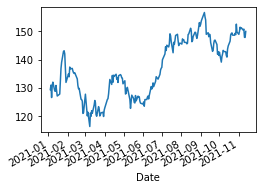

In [212]:
plot_data = yf.download("AAPL", period="YTD")
fig1, ax1 = plt.subplots(figsize=(4, 3))
plot_data.Close.plot()
fig1.tight_layout(pad=2.0)
plt.show()

In [8]:
from yahoofinancials import YahooFinancials

In [282]:
ticker = 'DELL'
plot_data = yf.download(ticker,  period = "5d", interval='15m')
#Moving avg
plot_data['MA30'] = plot_data.Close.rolling(30).mean()


[*********************100%***********************]  1 of 1 completed


In [1]:
def format_cols(df):
    loops = len(df) + 1 
    list_index = []
    for i in df.index:  
        list_index.append(re.sub(r"(\w)([A-Z])", r"\1 \2", i).title())
    df.index = list_index

In [6]:
def GetFinancials(ticker):
    inc_stm = si.get_income_statement(ticker)
    bal_sht = si.get_balance_sheet(ticker)
    cash_flw = si.get_cash_flow(ticker)
    return inc_stm, bal_sht, cash_flw

In [7]:
ticker = "DELL"

In [9]:
import re
income, balance, cash  = GetFinancials(ticker)
income_f = format_cols(income)

In [14]:
inc_stm = si.get_income_statement(ticker)

In [16]:
format_cols(inc_stm)

In [17]:
inc_stm

endDate,2021-01-29,2020-01-31,2019-02-01,2018-02-02
Research Development,5275000000,4992000000,4604000000,4384000000
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,3670000000,-4000000,-2361000000,-4769000000
Minority Interest,5074000000,4729000000,4823000000,5766000000
Net Income,3250000000,4616000000,-2310000000,-2849000000
Selling General Administrative,19235000000,20463000000,20450000000,18569000000
Gross Profit,29417000000,28928000000,25266000000,20561000000
Ebit,4907000000,3473000000,212000000,-2392000000
Operating Income,4907000000,3473000000,212000000,-2392000000
Other Operating Expenses,None,None,None,None


In [19]:
a = si.get_analysts_info("DELL")

In [20]:
a.keys()

dict_keys(['Earnings Estimate', 'Revenue Estimate', 'Earnings History', 'EPS Trend', 'EPS Revisions', 'Growth Estimates'])

In [21]:
a['Earnings Estimate']

,Earnings Estimate,Current Qtr. (Oct 2021),Next Qtr. (Jan 2022),Current Year (2022),Next Year (2023)
0,No. of Analysts,8.00,8.00,10.00,10.00
1,Avg. Estimate,2.09,1.89,7.91,6.98
2,Low Estimate,1.23,1.28,5.91,6.12
3,High Estimate,2.45,2.77,9.60,9.00
4,Year Ago EPS,2.03,2.70,8.00,7.91


In [95]:
plot_data = si.get_data("AAPL", start_date = "11/14/2020", end_date = "11/14/2021")


In [246]:
def chart_line(ticker, start_date, end_date, interval):
    plot_data = si.get_data(ticker, start_date = start_date, end_date=end_date, interval=interval)
    
    fig = go.Figure()

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, subplot_titles=('Trend', 'Volume'), 
                    row_width=[0.2, 0.7])

    #add line plot for close price
    fig.add_trace(
        go.Scatter(x=plot_data.index,y =plot_data.close,
        #add df text for tooltips
        text = plot_data.round()
        ), row=1,col=1)

    #add bar chart for volume
    fig.add_trace(
        go.Bar(
            x=plot_data.index,y =plot_data.volume,
            text = plot_data.round()), row=2, col=1)       

    fig.update_layout(height=600, width=1000)     


    #add tooltips
    fig.update_traces(
        hovertemplate="<br>".join([
            "Date: %{x}",
            "Open: %{text[0]}",
            "High: %{text[1]}",
            "Low: %{text[2]}",
            "Close: %{text[3]}",
            "Adj Close: %{text[4]}",
            "Volume: %{text[5]}",
        ])
    )    
    fig.update_layout(showlegend=False)
    
    fig2.update(layout_xaxis_rangeslider_visible=False)
    fig2.update_layout(height=600, width=1000)
    fig2.update_xaxes(
    rangeslider_visible=True, 
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),rangeselector_bgcolor="blue"
)
    return fig

In [251]:
chart_line("AAPL", start_date = "11/14/2020", end_date = "12/20/2020", interval="1d")

In [268]:
date = datetime.today().date()
date.strptime(date, "%Y-%m-%d")

NameError: name 'strptime' is not defined

In [304]:
class MonteCarlo(object):
    
        def __init__(self, ticker, data_source, start_date, end_date, time_horizon, n_simulation, seed):
            
            # Initiate class variables
            self.ticker = ticker  # Stock ticker
            self.data_source = data_source  # Source of data, e.g. 'yahoo'
            self.start_date = dt.datetime.strptime(start_date, '%Y-%m-%d')  # Text, YYYY-MM-DD
            self.end_date = dt.datetime.strptime(end_date, '%Y-%m-%d')  # Text, YYYY-MM-DD
            self.time_horizon = time_horizon  # Days
            self.n_simulation = n_simulation  # Number of simulations
            self.seed = seed  # Random seed
            self.simulation_df = pd.DataFrame()  # Table of results
            
            # Extract stock data
            self.stock_price = web.DataReader(ticker, data_source, self.start_date, self.end_date)
            
            # Calculate financial metrics
            # Daily return (of close price)
            self.daily_return = self.stock_price['Close'].pct_change()
            # Volatility (of close price)
            self.daily_volatility = np.std(self.daily_return)
            
        def run_simulation(self):
            
            # Run the simulation
            np.random.seed(self.seed)
            self.simulation_df = pd.DataFrame()  # Reset
            
            for i in range(self.n_simulation):

                # The list to store the next stock price
                next_price = []

                # Create the next stock price
                last_price = self.stock_price['Close'][-1]

                for j in range(self.time_horizon):
                    
                    # Generate the random percentage change around the mean (0) and std (daily_volatility)
                    future_return = np.random.normal(0, self.daily_volatility)

                    # Generate the random future price
                    future_price = last_price * (1 + future_return)

                    # Save the price and go next
                    next_price.append(future_price)
                    last_price = future_price

                # Store the result of the simulation
                self.simulation_df[i] = next_price

        def plot_simulation_price(self):
            
            # Plot the simulation stock price in the future
            fig, ax = plt.subplots()
            fig.set_size_inches(15, 10, forward=True)

            plt.plot(self.simulation_df)
            plt.title('Monte Carlo simulation for ' + self.ticker + \
                    ' stock price in next ' + str(self.time_horizon) + ' days')
            plt.xlabel('Day')
            plt.ylabel('Price')

            plt.axhline(y=self.stock_price['Close'][-1], color='red')
            plt.legend(['Current stock price is: ' + str(np.round(self.stock_price['Close'][-1], 2))])
            ax.get_legend().legendHandles[0].set_color('red')

            return plt
        
        def plot_simulation_hist(self):
            
            # Get the ending price of the 200th day
            ending_price = self.simulation_df.iloc[-1:, :].values[0, ]

            # Plot using histogram
            plt.hist(ending_price, bins=50)
            plt.axvline(x=self.stock_price['Close'][-1], color='red')
            plt.legend(['Current stock price is: ' + str(np.round(self.stock_price['Close'][-1], 2))])
            ax.get_legend().legendHandles[0].set_color('red')
            return plt

        def plot_simulation_hist(self):
        
            # Get the ending price of the 200th day
            ending_price = self.simulation_df.iloc[-1:, :].values[0, ]

            # Plot using histogram
            plt.hist(ending_price, bins=50)
            plt.axvline(x=self.stock_price['Close'][-1], color='red')
            plt.legend(['Current stock price is: ' + str(np.round(self.stock_price['Close'][-1], 2))])
            ax.get_legend().legendHandles[0].set_color('red')
            plt.show()
        
        def value_at_risk(self):
            # Price at 95% confidence interval
            future_price_95ci = np.percentile(self.simulation_df.iloc[-1:, :].values[0, ], 5)

            # Value at Risk
            VaR = self.stock_price['Close'][-1] - future_price_95ci
            print('VaR at 95% confidence interval is: ' + str(np.round(VaR, 2)) + ' USD')    


In [277]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.core.indexes.base import Index
import yahoo_fin.stock_info as si
import yfinance as yf
import streamlit as st
import numpy as np
import numpy as np
import pandas_datareader.data as web
import datetime as dt


In [297]:
start = datetime.today().date() - timedelta(days=365)
#start.strftime('%Y-%m-%d')
start = start.strftime('%Y-%m-%d')
start

'2020-11-15'

<module 'matplotlib.pyplot' from 'C:\\Users\\irana\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

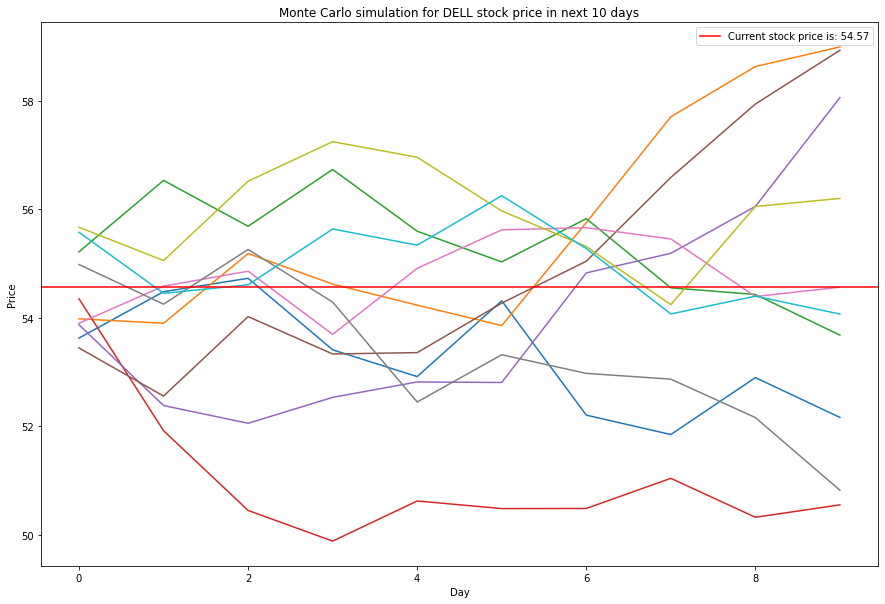

In [305]:

mc_sim = MonteCarlo(ticker=ticker, data_source='yahoo',
                        start_date=start, end_date='2021-11-04',
                        time_horizon=10, n_simulation=10, seed=123)
    
    # Plot the results
mc_sim.run_simulation()
mc_sim.plot_simulation_price()

VaR at 95% confidence interval is: 3.9 USD


In [ ]:
def chart_line(ticker, start_date, end_date, interval):
    plot_data = si.get_data(ticker, start_date = start_date, end_date=end_date, interval=interval)
    
    fig = go.Figure()

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.03, subplot_titles=('Trend', 'Volume'), 
                    row_width=[0.2, 0.7])

    #add line plot for close price
    fig.add_trace(
        go.Scatter(x=plot_data.index,y =plot_data.close,
        #add df text for tooltips
        text = plot_data.round()
        ), row=1,col=1)

    #add bar chart for volume
    fig.add_trace(
        go.Bar(
            x=plot_data.index,y =plot_data.volume,
            text = plot_data.round()), row=2, col=1)       

    fig.update_layout(height=600, width=1000)     


    #add tooltips
    fig.update_traces(
        hovertemplate="<br>".join([
            "Date: %{x}",
            "Open: %{text[0]}",
            "High: %{text[1]}",
            "Low: %{text[2]}",
            "Close: %{text[3]}",
            "Adj Close: %{text[4]}",
            "Volume: %{text[5]}",
        ])
    )    
    fig.update_layout(showlegend=False)
    
    fig2.update(layout_xaxis_rangeslider_visible=False)
    fig2.update_layout(height=600, width=1000)
    fig2.update_xaxes(
    rangeslider_visible=True, 
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    ),rangeselector_bgcolor="blue"
)
    return fig

In [309]:
analyst = si.get_analysts_info("DELL")

In [314]:
analyst = si.get_analysts_info("DELL")
for key in analyst:
    print(analyst[key])

  Earnings Estimate  Current Qtr. (Oct 2021)  Next Qtr. (Jan 2022)  \
0   No. of Analysts                     8.00                  8.00   
1     Avg. Estimate                     2.09                  1.89   
2      Low Estimate                     1.23                  1.28   
3     High Estimate                     2.45                  2.77   
4      Year Ago EPS                     2.03                  2.70   

   Current Year (2022)  Next Year (2023)  
0                10.00             10.00  
1                 7.91              6.98  
2                 5.91              6.12  
3                 9.60              9.00  
4                 8.00              7.91  
          Revenue Estimate Current Qtr. (Oct 2021) Next Qtr. (Jan 2022)  \
0          No. of Analysts                       5                    5   
1            Avg. Estimate                  27.01B               26.29B   
2             Low Estimate                  25.53B               25.11B   
3            High Est

In [315]:
analyst = si.get_analysts_info(ticker)
earnings_estimate = analyst['Earnings Estimate']
revenue_estimate = analyst['Revenue Estimate']
earnings_history = analyst['Earnings History']
eps_trend = analyst['EPS Trend']
eps_revisions = analyst['EPS Revisions']
growth_estimates = analyst['Growth Estimates']

In [316]:
dfs = analyst.keys()
dfs

dict_keys(['Earnings Estimate', 'Revenue Estimate', 'Earnings History', 'EPS Trend', 'EPS Revisions', 'Growth Estimates'])